In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

## Tests sur l'opérateur S

In [3]:
def test_approx_S(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol = approxh(x,p,f,h,epsilon,s,ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    
    return px,fx

In [4]:
h = [1e-2,1,1/4]
p = [21,11,11]
epsilon = [1e-9,1e-5,1e-9]
fonctions = FT.fonctions_etude_S()

############################################################################################################
######################        Fonction absolu_h_retard, p = 21, h = 0.01, epsilon = 1e-09     #######################
############################################################################################################


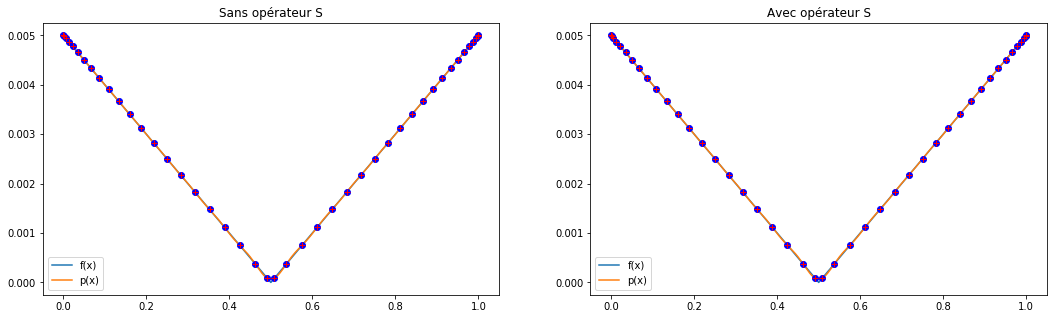

Sans opérateur Séparateur : 
     Norme 2 : 0.00019379560673057753
     Trapezes : 5.14504617105192e-06
Avec opérateur Séparateur : 
     Norme 2 : 0.00019379560673057845
     Trapezes : 5.14504617105192e-06

############################################################################################################
######################        Fonction abs_poly_h_7, p = 11, h = 1, epsilon = 1e-05     #######################
############################################################################################################


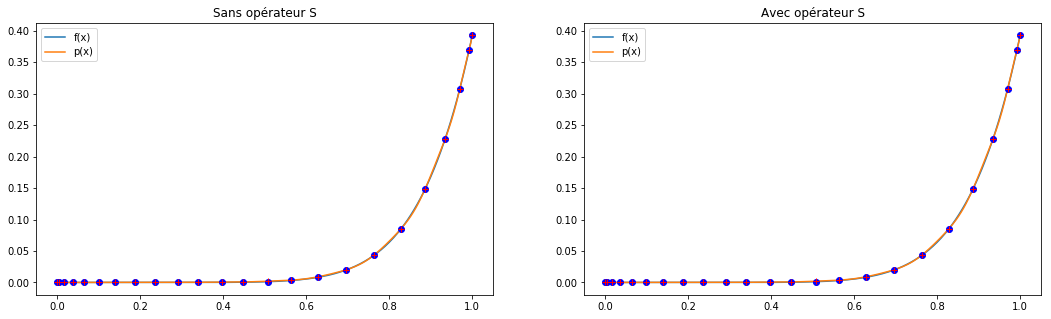

Sans opérateur Séparateur : 
     Norme 2 : 0.0186225453621362
     Trapezes : 0.0005639000664535033
Avec opérateur Séparateur : 
     Norme 2 : 0.01862254536213704
     Trapezes : 0.0005639000664535033

############################################################################################################
######################        Fonction gaussienne_h, p = 11, h = 0.25, epsilon = 1e-09     #######################
############################################################################################################


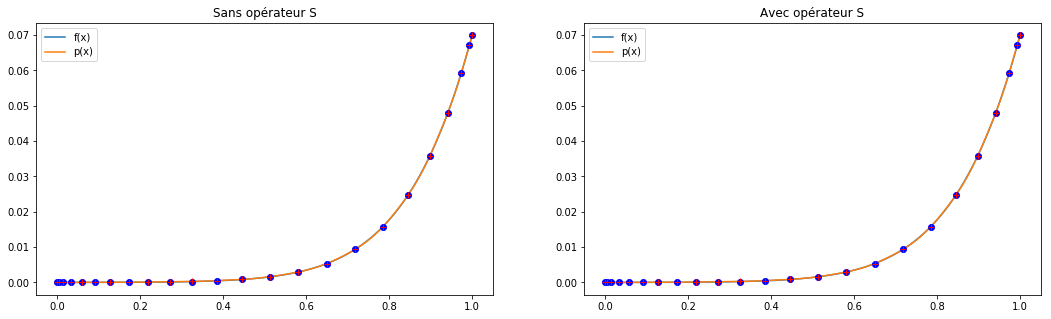

Sans opérateur Séparateur : 
     Norme 2 : 0.0013684038678503836
     Trapezes : 4.866353375677014e-05
Avec opérateur Séparateur : 
     Norme 2 : 0.0013684038678503736
     Trapezes : 4.866353375677014e-05



In [5]:
for i in range(3):
    name = str(fonctions[i]).split(' ')[1]
    print("############################################################################################################")
    print("######################        Fonction "+name+", p = "+str(p[i])+", h = "+str(h[i])+", epsilon = "\
          +str(epsilon[i])+"     #######################")
    print("############################################################################################################")
    plt.figure(0,figsize=(18,5))
    plt.subplot(1,2,1)
    sansS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,0)
    plt.title("Sans opérateur S")
    plt.subplot(1,2,2)
    avecS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Avec opérateur S")
    plt.show()
        
    print("Sans opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(sansS[0]-sansS[1]))
    print("     Trapezes :", trapezes(sansS[0]-sansS[1]))
    print("Avec opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(avecS[0]-avecS[1]))
    print("     Trapezes :",trapezes(sansS[0]-sansS[1]))
    print()

## Effet du point initial

In [6]:
def Newton_Raphson (p,f,h,epsilon,init,s=None,eps=1e-12,itermax=100):
    # reconstruit le polynome le plus interpolant
    epsi = epsi_S(p)
    #initialisation
    X = init(p)  
    X = np.concatenate((X[:p],X[p+2:]))
    k=0
    err=2*eps
    Residus = []

    while 20 > k :#and err > eps :
        X0 = np.copy(X)
        #print(f_theta(X,p,f,h,epsilon))
        d = npl.solve(Jp(p,f,h,X,epsilon),f_theta(X,p,f,h,epsilon))
        X = X - d
        if s != None and s != 0 :
            X = S(p,epsi,X)
        #print(f_theta(X,p,f,h,epsilon))
        k+=1
        err = npl.norm(X-X0)/npl.norm(X0)
        Residus += [err]
    return X,k,Residus

def approxh(x,p,f,h,epsilon,init,s=None,ResidusNewton=None):
    #X = sco.fsolve(f_theta,np.array([1/4,3/4]), args=(p,f,h,epsilon))
    #X = S(p,epsi,X)
    X,itermax,residus = Newton_Raphson(p,f,h,epsilon,init,s)
    if ResidusNewton is not None and ResidusNewton != 0:
        affichage_residus(residus,p,f,h,epsilon)
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),[X,a_alpha,b_beta]

In [7]:
def test_approx_init(p,f,h,epsilon,init,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol = approxh(x,p,f,h,epsilon,init,s,ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    return px,fx

In [8]:
def X_equi(p):
    x = np.linspace(0,1,2*(p+1))
    X = np.zeros(2*(p+1))
    X[:p+1] = x[1::2]
    X[p+1:] = x[::2]
    return X

################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


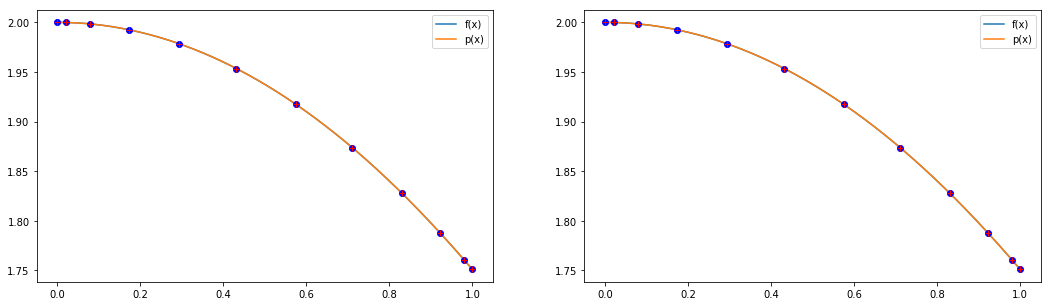

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  1.3026335078765292e-08     1.302633523322084e-08
    Norme inf :  1.029372587169064e-09     1.0293721430798541e-09
    Trapeze :  5.015620259118947e-10     5.015620316850544e-10


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


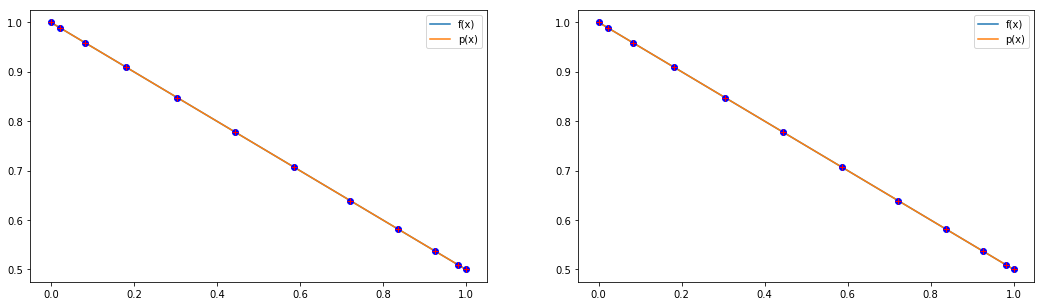

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  8.824003430169476e-15     8.985950657574134e-15
    Norme inf :  1.4432899320127035e-15     1.6653345369377348e-15
    Trapeze :  2.612354776942988e-16     2.439159985101464e-16


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


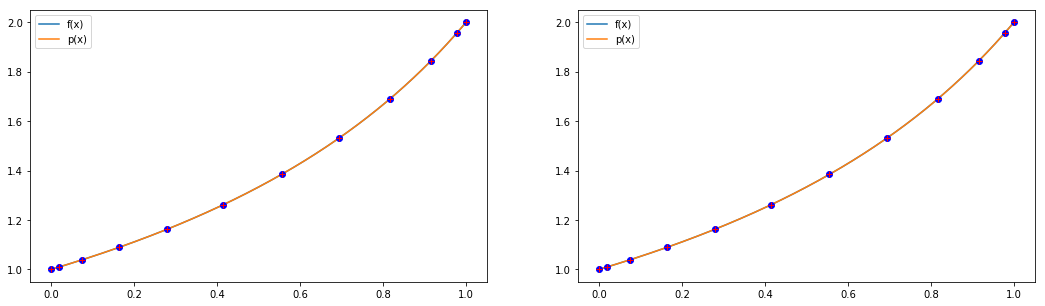

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.751830343883517e-08     4.751830226372474e-08
    Norme inf :  4.0880627771855416e-09     4.088063221274751e-09
    Trapeze :  1.7853020382041498e-09     1.7853019729230376e-09


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


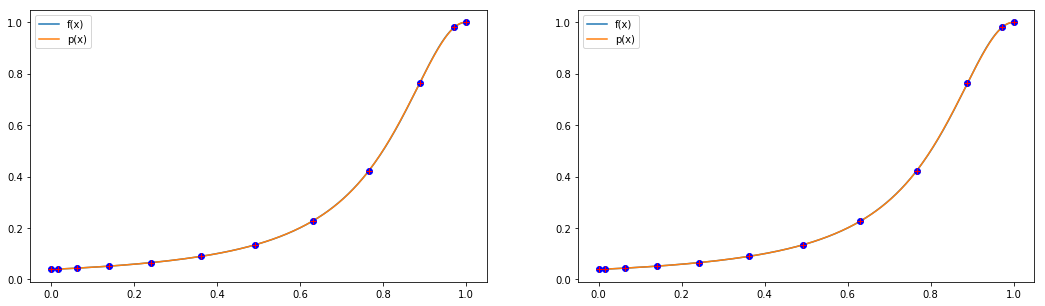

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.012703108592755518     0.012686190835393154
    Norme inf :  0.0017653253646455758     0.0017636489625778573
    Trapeze :  0.00033472786309794006     0.0003341207499340396


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


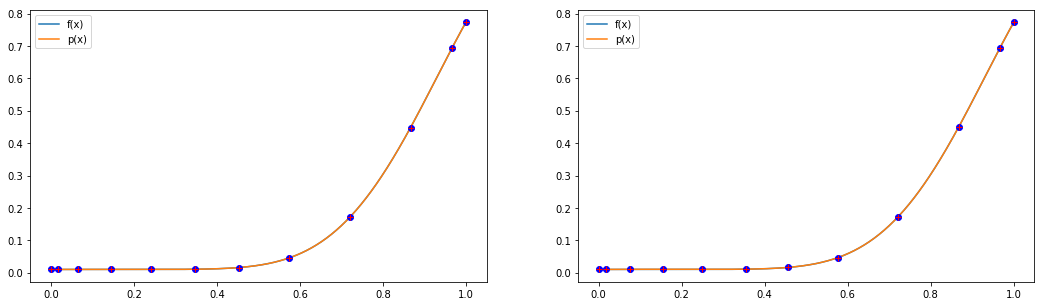

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  7.540446422002581e-05     0.003555780267854304
    Norme inf :  7.702200815071225e-06     0.0004811642137124549
    Trapeze :  2.5230089747987114e-06     9.767311439018463e-05


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


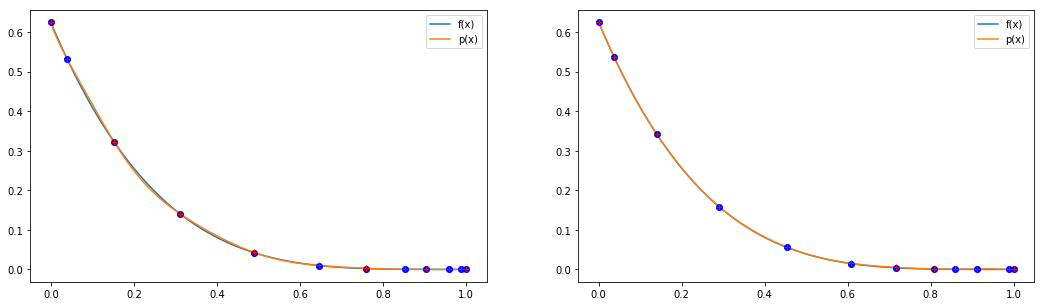

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.0664918040096318     0.015577366340562736
    Norme inf :  0.007720474951756207     0.0015056516817726175
    Trapeze :  0.0020490542335489252     0.0006067116772280082


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


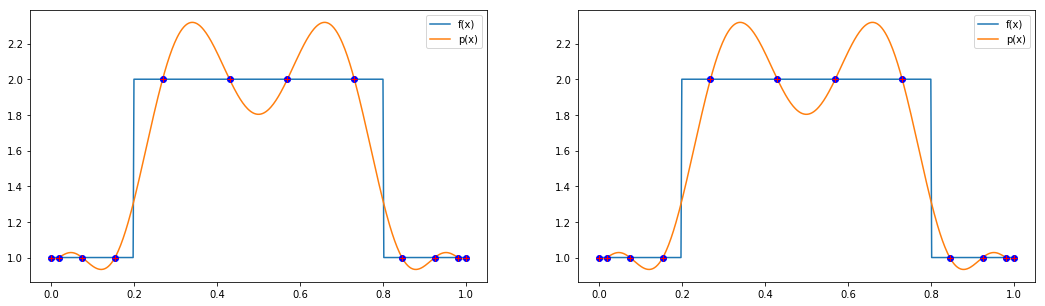

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.692136746085273     4.692136746092121
    Norme inf :  0.6807253639296031     0.6807253639297828
    Trapeze :  0.1509047114262357     0.15090471142652848


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


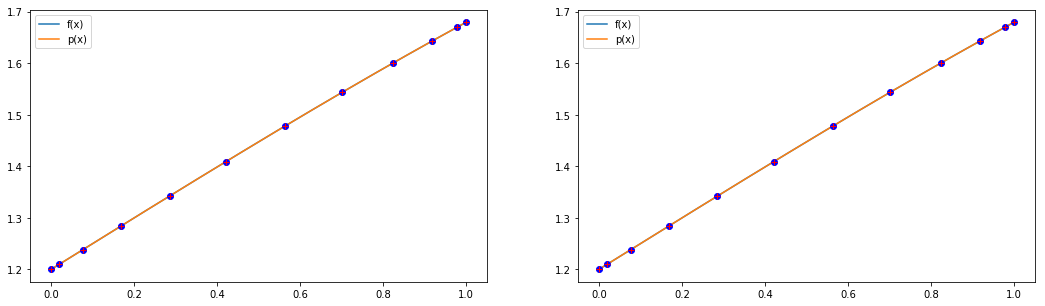

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  1.2503694280231314e-14     1.3577442056176679e-14
    Norme inf :  1.9984014443252818e-15     1.9984014443252818e-15
    Trapeze :  3.330669073875465e-16     3.925748615074555e-16


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


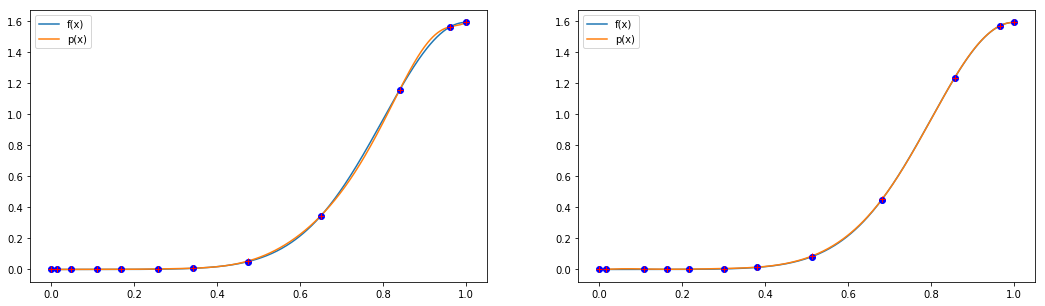

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.25874281936284926     0.053523876472756415
    Norme inf :  0.030011762551038323     0.004935824091426316
    Trapeze :  0.007417481449491596     0.001956000355734325


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


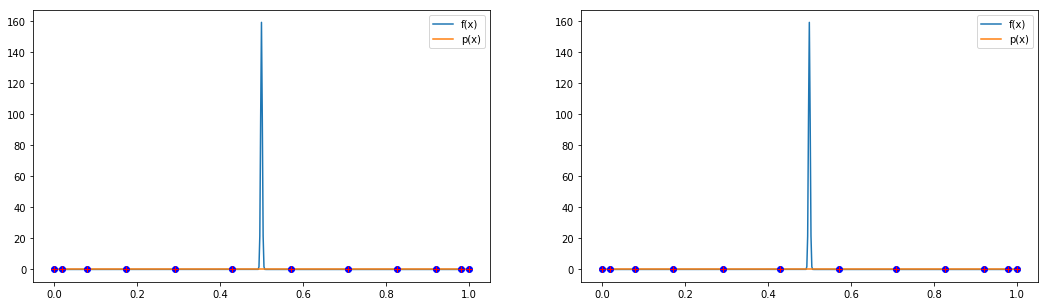

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  211.8995633303015     211.8995633303015
    Norme inf :  159.15494309089536     159.15494309089536
    Trapeze :  0.7978845660079886     0.7978845660079886




In [9]:
h = 1/2
p = 5
epsilon = 1e-9
fonctions = FT.fonctions("Sans Arg")
init = [init_X,X_equi]
Err = np.zeros((len(fonctions),len(init),3))
    

for f in range(len(fonctions)) : 
    print("################################################################################################")
    print(("##########    Fonction "+str(fonctions).split(' ')[1]+", Init = "+ str(init).split(' ')[1]+", h ="+str(h)+\
    ", p"+str(p)+", eps = "+str(epsilon)+"        ################"))
    print("################################################################################################")
    plt.figure(figsize=(18,5))
    for i in range(len(init)) : 
        plt.subplot(1,2,i+1)
        px,fx = test_approx_init(p,fonctions[f],h,epsilon,init[i],1)
        Err[f,i,0] = npl.norm(px-fx) 
        Err[f,i,1] = npl.norm(px-fx,np.inf)
        Err[f,i,2] = trapezes(px-fx)
    plt.show()
    print("Erreur pour init_x et x_equi (respectivement): ")
    print("    Norme 2 : ", Err[f,0,0],"   ", Err[f,1,0])
    print("    Norme inf : ", Err[f,0,1],"   ", Err[f,1,1])
    print("    Trapeze : ", Err[f,0,2],"   ", Err[f,1,2])
    print("\n")
       ##peut etre faire la différence entre les deux resultats                          